# Importing

In [255]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# Data

In [256]:
data_train = pd.read_csv('./data/insurance_train_data.csv')
data_test = pd.read_csv('./data/insurance_test_data_version2.csv')

In [257]:
data_train.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,1
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,1
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [258]:
data_train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6658.000000,7160.000000
mean,2013.670112,0.909864,0.305726,1883.727530,2.186034,1964.450285,0.231145
std,1.383902,0.239628,0.460747,2278.157745,0.940632,35.989880,0.421595
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [259]:
data_train["Building_Painted"].replace({"N":1, "V":0}, inplace=True)

data_train["Building_Fenced"].replace({"N":1, "V":0}, inplace=True)

data_train["Garden"].replace({"V":1, "O":0}, inplace=True)

data_train["Settlement"].replace({"R":1, "U":0}, inplace=True)

In [260]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int64  
 5   Building_Fenced     7160 non-null   int64  
 6   Garden              7153 non-null   float64
 7   Settlement          7160 non-null   int64  
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6658 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 783.2+ KB


In [261]:
data_train["NumberOfWindows"].value_counts()

.       3542
4        940
3        850
5        639
2        364
6        306
7        212
8        116
1         75
>=10      66
9         50
Name: NumberOfWindows, dtype: int64

In [262]:
data_train["NumberOfWindows"].replace({
    ".":0,
    "1":1,
    "2":2,
    "3":3,
    "4":4,
    "5":5,
    "6":6,
    "7":7,
    "8":8,
    "9":9,
    ">=10":10}, inplace=True)

In [263]:
data_train["Geo_Code"].value_counts()

6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
59650      1
59656      1
60057      1
60172      1
2B353      1
Name: Geo_Code, Length: 1307, dtype: int64

In [246]:
data_train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

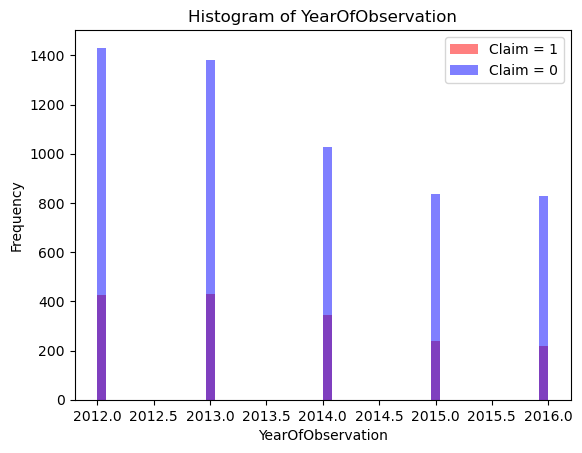

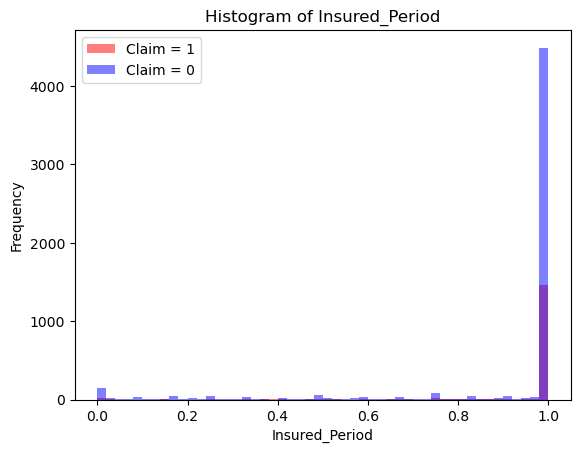

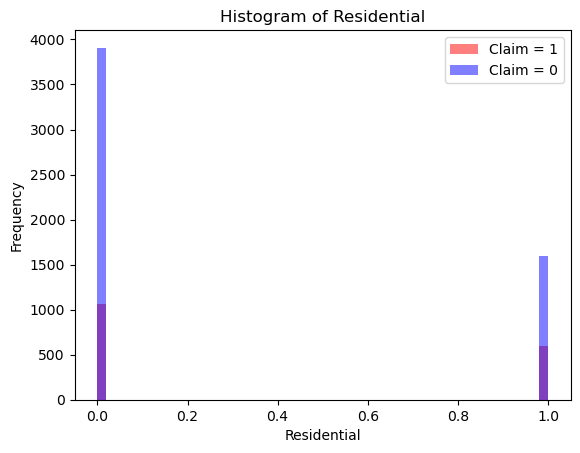

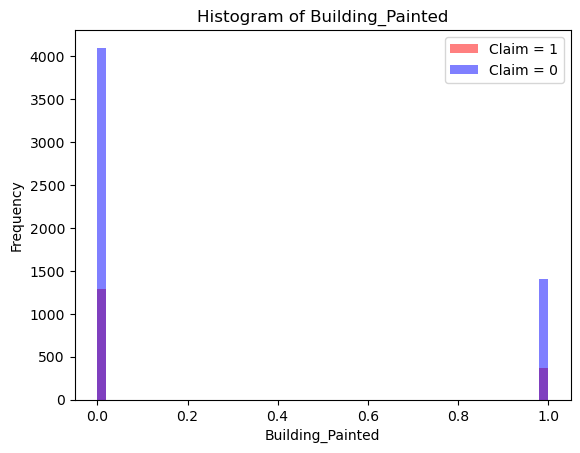

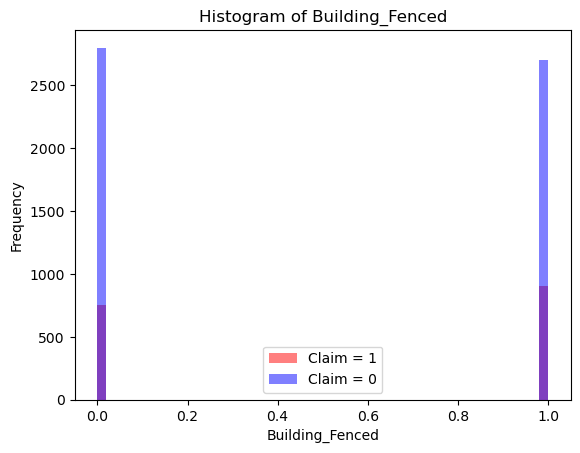

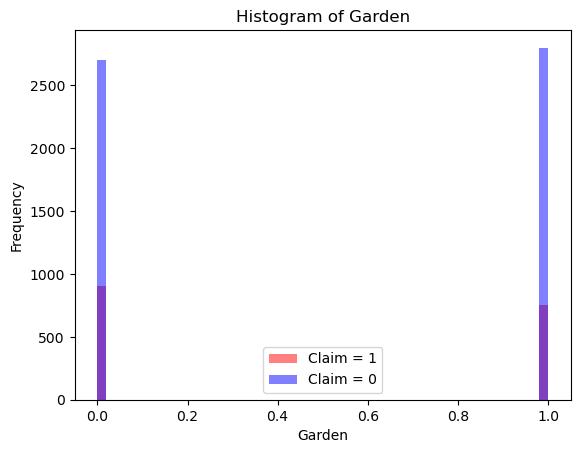

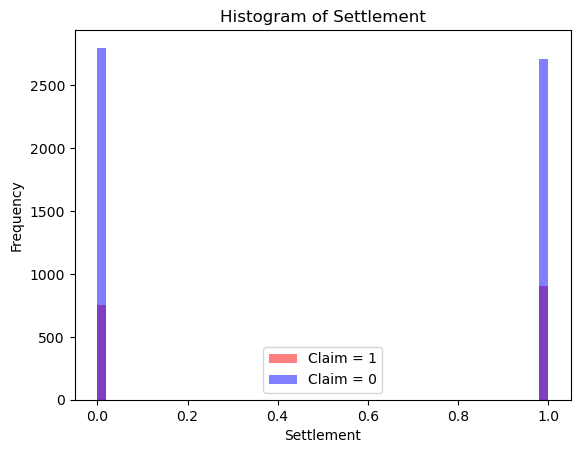

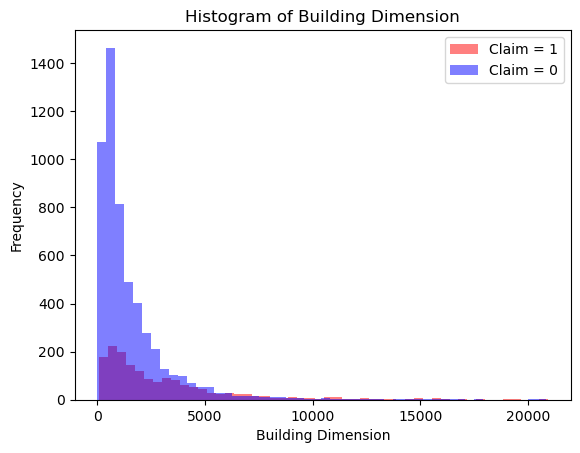

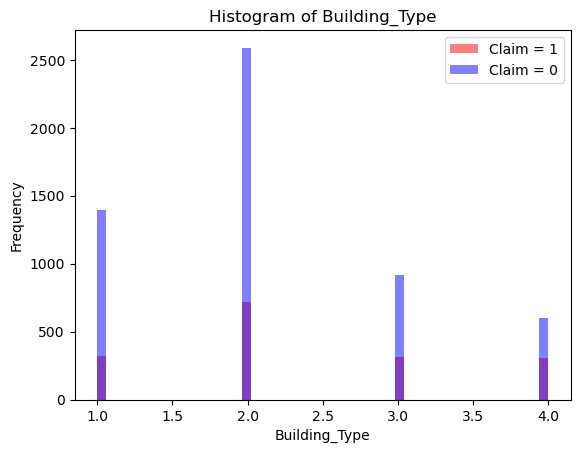

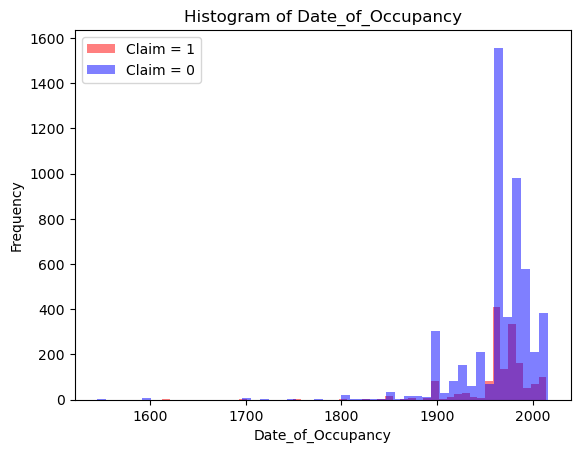

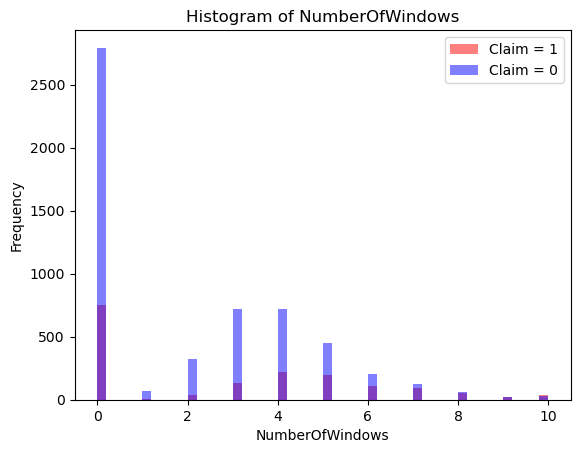

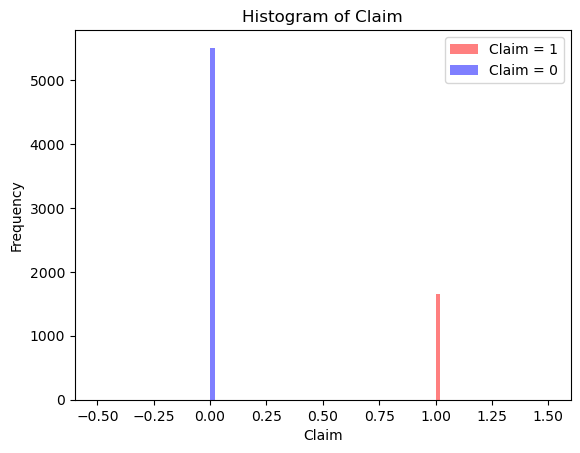

In [264]:
%matplotlib inline

for column in data_train.select_dtypes(exclude=['object']):
    fig, ax = plt.subplots()
    
    values_1 = data_train.loc[data_train['Claim'] == 1, column]
    values_0 = data_train.loc[data_train['Claim'] == 0, column]
    
    ax.hist(values_1, bins=50, alpha=0.5, color='red', label='Claim = 1')
    ax.hist(values_0, bins=50, alpha=0.5, color='blue', label='Claim = 0')
    
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
    ax.legend()
    
    plt.show()

# Feature selection

In [265]:
data_train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [266]:
data_train.dropna(inplace=True)

In [267]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6549 entries, 0 to 7057
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         6549 non-null   object 
 1   YearOfObservation   6549 non-null   int64  
 2   Insured_Period      6549 non-null   float64
 3   Residential         6549 non-null   int64  
 4   Building_Painted    6549 non-null   int64  
 5   Building_Fenced     6549 non-null   int64  
 6   Garden              6549 non-null   float64
 7   Settlement          6549 non-null   int64  
 8   Building Dimension  6549 non-null   float64
 9   Building_Type       6549 non-null   int64  
 10  Date_of_Occupancy   6549 non-null   float64
 11  NumberOfWindows     6549 non-null   int64  
 12  Geo_Code            6549 non-null   object 
 13  Claim               6549 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 767.5+ KB


In [268]:
data_train.drop("Geo_Code", axis=1, inplace=True)

In [272]:
from sklearn.feature_selection import mutual_info_classif

feature_cols = [col for col in data_train.columns if ( col != 'Claim' and col != 'Customer Id' )]

mutual_info = mutual_info_classif(data_train[feature_cols], data_train['Claim'])

mi_tuples = list(zip(feature_cols, mutual_info))

mi_tuples_sorted = sorted(mi_tuples, key=lambda x: x[1], reverse=True)

for col, mi_score in mi_tuples_sorted:
    print(f"{col}: {mi_score}")

Building Dimension: 0.06338955609524377
NumberOfWindows: 0.019705126581052612
Building_Type: 0.0075153125746205696
Insured_Period: 0.0062805307695765755
Date_of_Occupancy: 0.00145266512750708
YearOfObservation: 0.0
Residential: 0.0
Building_Painted: 0.0
Building_Fenced: 0.0
Garden: 0.0
Settlement: 0.0


In [273]:
X = data_train.drop(["Claim"], axis=1)
y = data_train["Claim"]

In [274]:
X.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
count,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000
mean,2013.694152,0.922596,0.294854,0.248435,0.549855,0.449992,0.550008,1931.996793,2.171477,1964.447549,2.387845
std,1.388186,0.216740,0.456012,0.432138,0.497546,0.497531,0.497531,2309.837827,0.935654,35.709707,2.539092
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,546.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1114.000000,2.000000,1970.000000,2.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2396.000000,3.000000,1980.000000,4.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.000000


In [275]:
X_train = X.copy()

In [276]:
X_train["Date_of_Occupancy"] = (X["Date_of_Occupancy"] - X["Date_of_Occupancy"].min()) / (X["Date_of_Occupancy"].max() - X["Date_of_Occupancy"].min())

X_train["NumberOfWindows"] = X["NumberOfWindows"] / 10

X_train["Building Dimension"] = ( X["Building Dimension"] - X["Building Dimension"].mean()) / (X["Building Dimension"].std() )

X_train["YearOfObservation"] = ( X["YearOfObservation"] - X["YearOfObservation"].min()) / (X["YearOfObservation"].max() - X["YearOfObservation"].min())

In [277]:
X_train.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
count,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6.549000e+03,6549.000000,6549.000000,6549.000000
mean,0.423538,0.922596,0.294854,0.248435,0.549855,0.449992,0.550008,-5.424819e-18,2.171477,0.890547,0.238785
std,0.347046,0.216740,0.456012,0.432138,0.497546,0.497531,0.497531,1.000000e+00,0.935654,0.075817,0.253909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.359880e-01,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000407e-01,2.000000,0.881104,0.000000
50%,0.250000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-3.541360e-01,2.000000,0.902335,0.200000
75%,0.750000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.008813e-01,3.000000,0.923567,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.229151e+00,4.000000,1.000000,1.000000


In [278]:
X.shape

(6549, 12)

In [279]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6549 entries, 0 to 7057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         6549 non-null   object 
 1   YearOfObservation   6549 non-null   float64
 2   Insured_Period      6549 non-null   float64
 3   Residential         6549 non-null   int64  
 4   Building_Painted    6549 non-null   int64  
 5   Building_Fenced     6549 non-null   int64  
 6   Garden              6549 non-null   float64
 7   Settlement          6549 non-null   int64  
 8   Building Dimension  6549 non-null   float64
 9   Building_Type       6549 non-null   int64  
 10  Date_of_Occupancy   6549 non-null   float64
 11  NumberOfWindows     6549 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 665.1+ KB


In [280]:
X_train = X.drop("Customer Id", axis=1)

In [281]:
X_train.shape

(6549, 11)

# Model

In [282]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1, seed=42)

param_grid = {
    'max_depth': [5, 10, 20],
    'learning_rate': [0.03, 0.05, 0.08],
    'n_estimators': [50, 100, 500],
    'gamma': [0, 0.1, 0.01],
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    xgb_model, 
    param_grid, 
    cv=cv, 
    scoring='roc_auc', 
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(X_train, y)


print("Best parameters: ", grid_search.best_params_)
print("Best score: ROC", grid_search.best_score_)


Fitting 4 folds for each of 81 candidates, totalling 324 fits
Best parameters:  {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 100}
Best score: ROC 0.7105443077300388


In [284]:
model = grid_search.best_estimator_

In [289]:
probas = model.predict_proba(X_train)

for threshold in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    
    y_pred = (probas[:, 1] >= threshold).astype(int)

    print("Threshold: ", threshold)

    print("ROC: ", roc_auc_score(y, probas[:, 1]))

    print("Accuracy: ", accuracy_score(y, y_pred))
    print("Recall: ", recall_score(y, y_pred))
    print("Precision: ", precision_score(y, y_pred))
    print("F1: ", f1_score(y, y_pred))

    print("\n")

Threshold:  0.1
ROC:  0.7726458291857455
Accuracy:  0.29928233318063824
Recall:  0.9986893840104849
Precision:  0.249386352479136
F1:  0.39910959800968965


Threshold:  0.15
ROC:  0.7726458291857455
Accuracy:  0.48221102458390597
Recall:  0.927916120576671
Precision:  0.3014690227804982
F1:  0.4550859713964326


Threshold:  0.2
ROC:  0.7726458291857455
Accuracy:  0.6300198503588335
Recall:  0.7889908256880734
Precision:  0.3642965204236006
F1:  0.49844752639205137


Threshold:  0.25
ROC:  0.7726458291857455
Accuracy:  0.7236219270117575
Recall:  0.6317169069462647
Precision:  0.4358047016274864
F1:  0.5157838416265382


Threshold:  0.3
ROC:  0.7726458291857455
Accuracy:  0.7585890975721484
Recall:  0.5380078636959371
Precision:  0.48379493223335296
F1:  0.509463233012721


Threshold:  0.35
ROC:  0.7726458291857455
Accuracy:  0.7807298824247977
Recall:  0.4672346002621232
Precision:  0.5336826347305389
F1:  0.49825296995108315


Threshold:  0.4
ROC:  0.7726458291857455
Accuracy:  0.7938

In [315]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score


# Instantiate a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Define the grid search object
grid_search = GridSearchCV(
    rf_model, 
    param_grid, 
    cv=cv, 
    scoring='roc_auc', 
    n_jobs=-1
)

# Fit the grid search object to the training data
grid_search.fit(X_train, y)

# Extract the best estimator and print the best parameters and score
best_model = grid_search.best_estimator_
print("Best parameters: ", grid_search.best_params_)
print("Best score: ROC", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: ROC 0.7149771577498871
Accuracy:  0.7883646358222629
Recall:  0.1363040629095675
Precision:  0.7536231884057971
F1:  0.23085460599334073
ROC AUC:  0.5613831682256378


In [316]:
probas = best_model.predict_proba(X_train)

for threshold in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    
    y_pred = (probas[:, 1] >= threshold).astype(int)

    print("Threshold: ", threshold)

    print("ROC: ", roc_auc_score(y, probas[:, 1]))

    print("Accuracy: ", accuracy_score(y, y_pred))
    print("Recall: ", recall_score(y, y_pred))
    print("Precision: ", precision_score(y, y_pred))
    print("F1: ", f1_score(y, y_pred))

    print("\n")

Threshold:  0.1
ROC:  0.7442052273826114
Accuracy:  0.2623301267369064
Recall:  0.9993446920052425
Precision:  0.23996852871754523
F1:  0.38700672503489403


Threshold:  0.15
ROC:  0.7442052273826114
Accuracy:  0.4310581768208887
Recall:  0.9233289646133683
Precision:  0.280789159027501
F1:  0.4306234718826406


Threshold:  0.2
ROC:  0.7442052273826114
Accuracy:  0.653840280958925
Recall:  0.7083879423328965
Precision:  0.3723734068205305
F1:  0.48814630842176565


Threshold:  0.25
ROC:  0.7442052273826114
Accuracy:  0.7390441288746373
Recall:  0.5425950196592398
Precision:  0.45024469820554647
F1:  0.4921248142644874


Threshold:  0.3
ROC:  0.7442052273826114
Accuracy:  0.7602687433195908
Recall:  0.46854521625163825
Precision:  0.48507462686567165
F1:  0.4766666666666667


Threshold:  0.35
ROC:  0.7442052273826114
Accuracy:  0.7749274698427241
Recall:  0.41546526867627787
Precision:  0.5213815789473685
F1:  0.46243617797228304


Threshold:  0.4
ROC:  0.7442052273826114
Accuracy:  0.7

# Test generation

In [317]:
data_test = pd.read_csv('./data/insurance_test_data_version2.csv')

In [318]:
X_test = data_test

In [319]:
X_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H0,2013.0,0.350685,0.0,V,V,V,U,384.0,2.0,1980.0,.,26362
1,H10000,2013.0,1.000000,0.0,V,V,V,U,580.0,2.0,1960.0,.,13205
2,H10001,2013.0,1.000000,0.0,V,N,O,R,852.0,1.0,1994.0,3,13004
3,H10002,2013.0,1.000000,0.0,V,N,O,R,380.0,2.0,1960.0,3,13208
4,H10003,2015.0,1.000000,0.0,V,N,O,R,380.0,2.0,1960.0,3,13208


In [320]:
X_test["Building_Painted"].replace({"N":1, "V":0}, inplace=True)

X_test["Building_Fenced"].replace({"N":1, "V":0}, inplace=True)

X_test["Garden"].replace({"V":1, "O":0}, inplace=True)

X_test["Settlement"].replace({"R":1, "U":0}, inplace=True)

In [321]:
X_test.drop("Geo_Code", axis=1, inplace=True)

In [322]:
X_test["NumberOfWindows"].replace({
    ".":0,
    "1":1,
    "2":2,
    "2.0":2,
    "3":3,
    "4":4,
    "5":5,
    "6":6,
    "7":7,
    "8":8,
    "9":9,
    ">=10":10}, inplace=True)

In [323]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3068 non-null   object 
 1   YearOfObservation   3068 non-null   float64
 2   Insured_Period      3068 non-null   float64
 3   Residential         3068 non-null   float64
 4   Building_Painted    3068 non-null   int64  
 5   Building_Fenced     3068 non-null   int64  
 6   Garden              3068 non-null   int64  
 7   Settlement          3068 non-null   int64  
 8   Building Dimension  3068 non-null   float64
 9   Building_Type       3068 non-null   float64
 10  Date_of_Occupancy   2339 non-null   float64
 11  NumberOfWindows     3068 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 287.8+ KB


In [324]:
X_test["Date_of_Occupancy"] = (X_test["Date_of_Occupancy"] - X["Date_of_Occupancy"].min()) / (X["Date_of_Occupancy"].max() - X["Date_of_Occupancy"].min())

X_test["NumberOfWindows"] = X_test["NumberOfWindows"] / 10

X_test["Building Dimension"] = ( X_test["Building Dimension"] - X["Building Dimension"].mean()) / (X["Building Dimension"].std() )

X_test["YearOfObservation"] = ( X_test["YearOfObservation"] - X["YearOfObservation"].min()) / (X["YearOfObservation"].max() - X["YearOfObservation"].min())

In [325]:
X_test.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
count,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,2339.000000,3068.000000
mean,0.400016,0.922779,0.224250,0.451760,0.270209,0.731095,0.270209,-0.115784,2.360169,0.895700,0.118220
std,0.343446,0.218409,0.417156,0.497749,0.444140,0.443463,0.444140,0.972639,0.998370,0.053122,0.212145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.835988,1.000000,0.435244,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.629913,2.000000,0.881104,0.000000
50%,0.250000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.446783,2.000000,0.898089,0.000000
75%,0.750000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.001408,3.000000,0.923567,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.474037,4.000000,0.991507,1.000000


In [326]:
columns = {
    "Customer Id": [],
    "Claim": []
}

In [327]:
X_test.values[0]

array(['H0', 0.25, 0.350684932, 0.0, 0, 0, 1, 0, -0.6701755314547704, 2.0,
       0.9235668789808917, 0.0], dtype=object)

In [329]:
X_test.fillna(X_test.mean(), inplace=True)

C:\Users\PCPRODZ\AppData\Local\Temp\ipykernel_23672\1370263001.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test.fillna(X_test.mean(), inplace=True)


In [330]:
ids = X_test["Customer Id"].values
predictions = best_model.predict_proba(X_test.drop("Customer Id", axis=1))

In [336]:
(predictions[:,1]>0.2).astype(int).sum()

0

In [338]:
for threshold in [0.09, 0.08, 0.07]:
    columns["Claim"] = []

    for index, proba in enumerate(predictions):
        if(proba[1] > threshold):
            columns["Claim"].append(1)
        else:
            columns["Claim"].append(0)

    columns["Customer Id"] = ids

    submit = pd.DataFrame(columns)
    submit.to_csv(f"submit_{threshold}_tree.csv", index=False)

    print(f"For thresh = {threshold}\n",submit["Claim"].value_counts())

For thresh = 0.09
 1    2959
0     109
Name: Claim, dtype: int64
For thresh = 0.08
 1    3013
0      55
Name: Claim, dtype: int64
For thresh = 0.07
 1    3058
0      10
Name: Claim, dtype: int64
